# PyTplot annotations

This notebook shows how to set annotations on tplot figures. 

Originally created at the 2022 PyHC Spring Meeting Hackathon

The following line installs pyspedas, so this notebook can be used in Google Colab.  If you're running in an environment where pyspedas is already installed, you can comment out or skip this command.

In [2]:
!pip install pyspedas
!pip install "pytplot-mpl-temp>=2.2.71"


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from pyspedas import tplot, store_data, options, annotate, tplot_copy

Create a simple variable with 6 data points at 1.0:

In [4]:
store_data('data', data={'x': [1, 2, 3, 4, 5, 6], 'y': [1, 1, 1, 1, 1, 1]})
tplot_copy('data', 'data2')

By default, the tplot variable's name is used as the y-axis title

(ignore the Colab warnings)

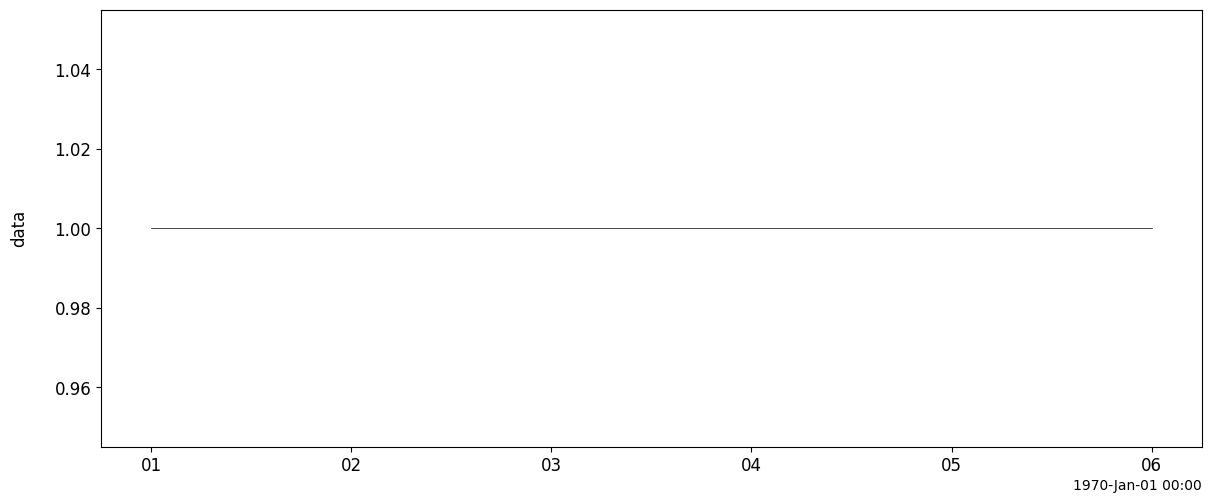

In [5]:
tplot('data')

You can change this by setting the `ytitle` option

In [6]:
options('data', 'ytitle', 'This is the data')

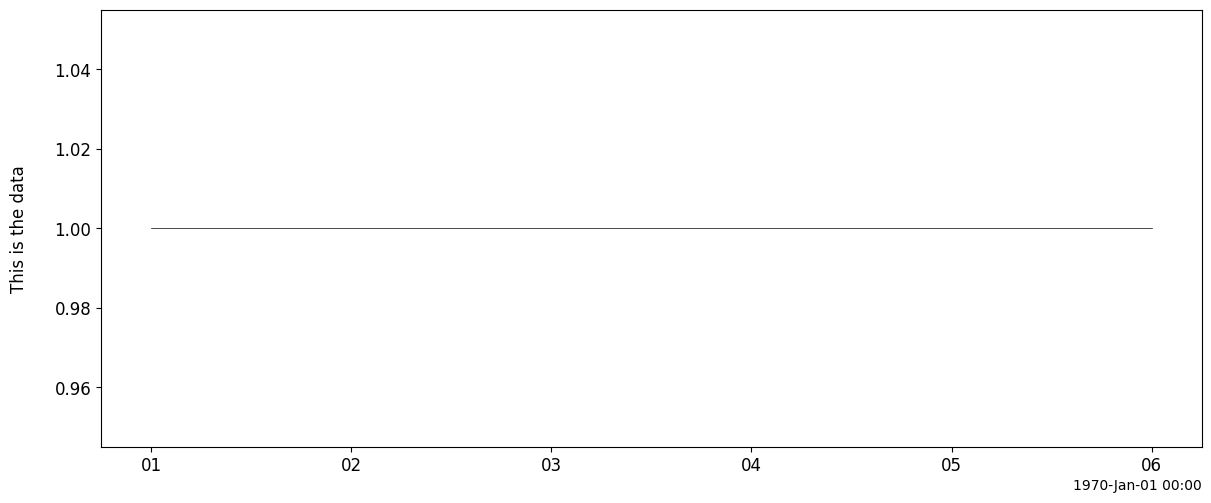

In [7]:
tplot('data')

Set a subtitle on the y-axis:

In [8]:
options('data', 'ysubtitle', '[units]')

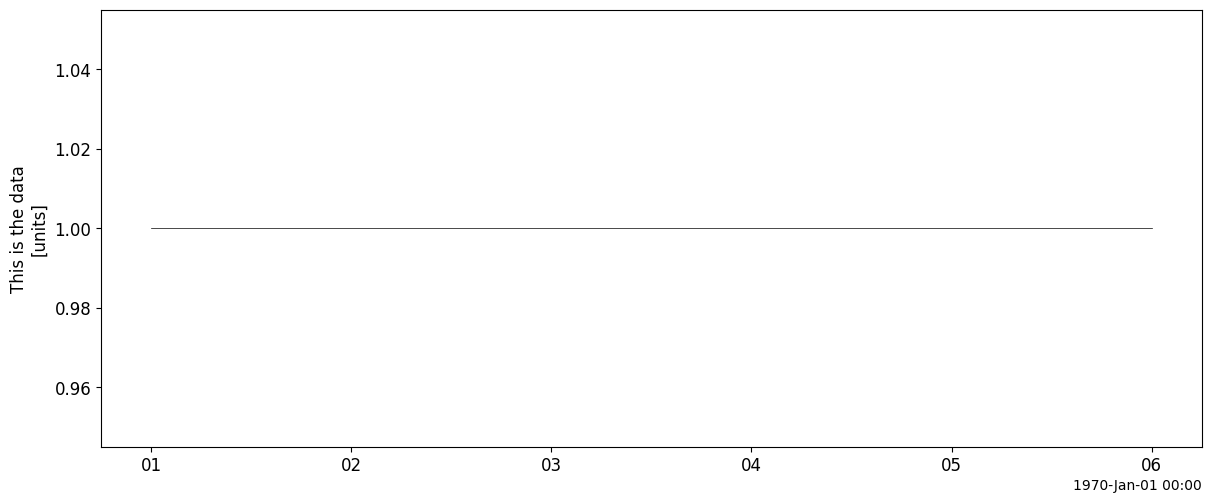

In [9]:
tplot('data')

Use greek letters in annotations

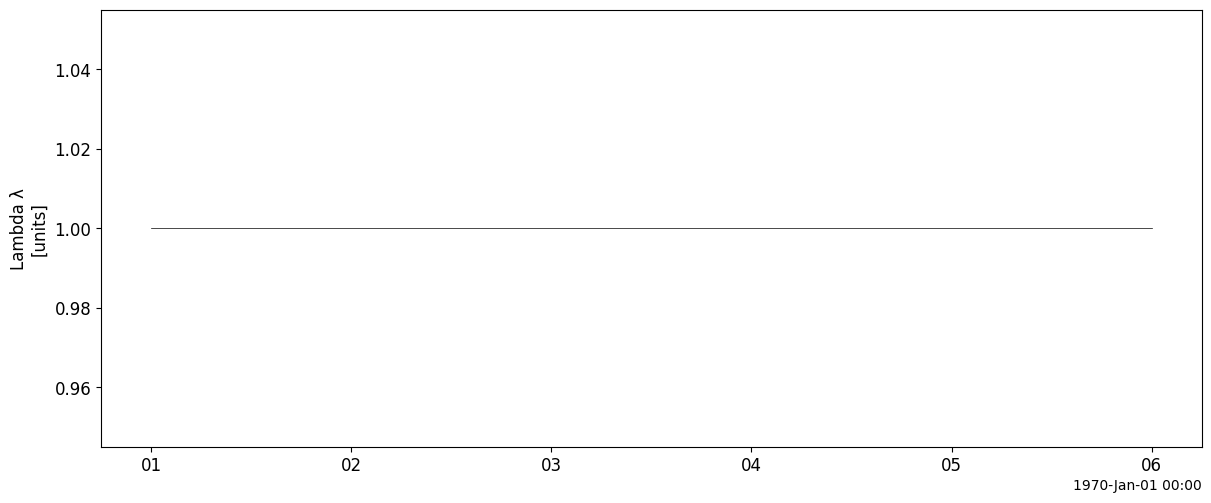

In [10]:
options('data', 'ytitle', 'Lambda λ')

tplot('data')

You can also use latex

Note: in this case, the string must be specific as a raw string

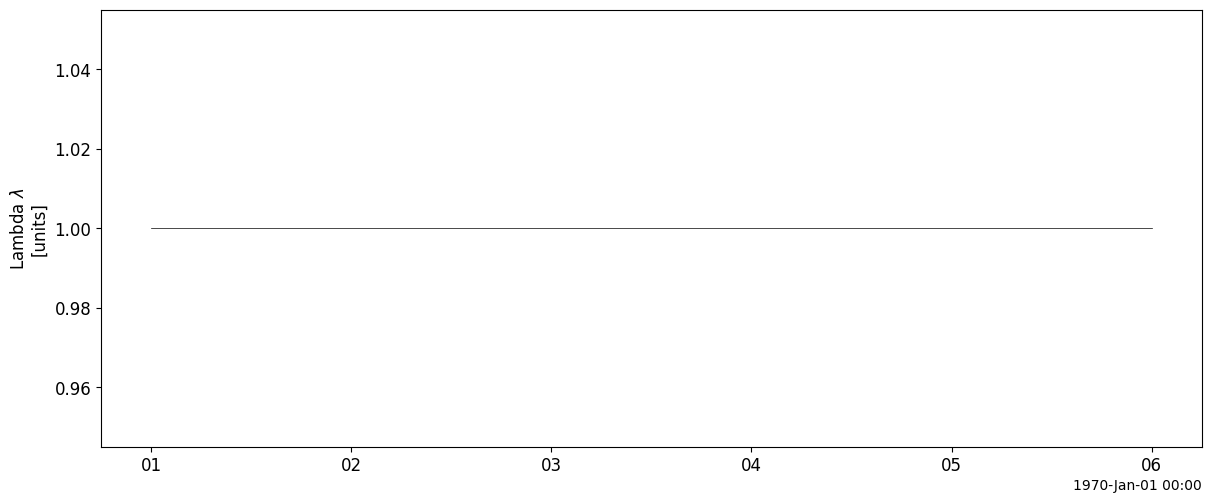

In [11]:
options('data', 'ytitle', r'Lambda $\lambda$')

tplot('data')

Use superscripts and subscripts in annotations; exponents can be set with a simple ^

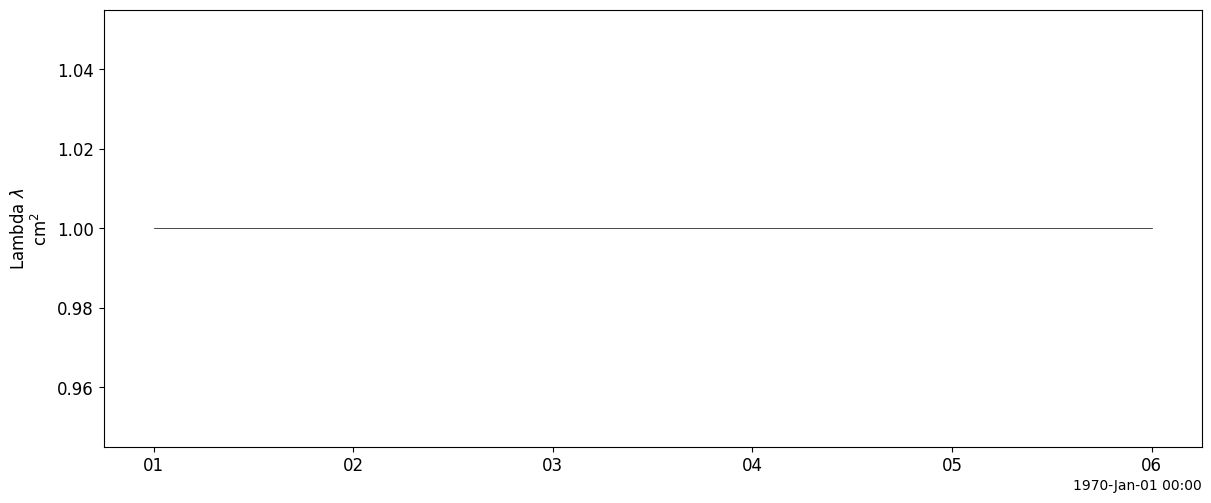

In [12]:
options('data', 'ysubtitle', r'cm^2')

tplot('data')

Use latex to specify subscripts

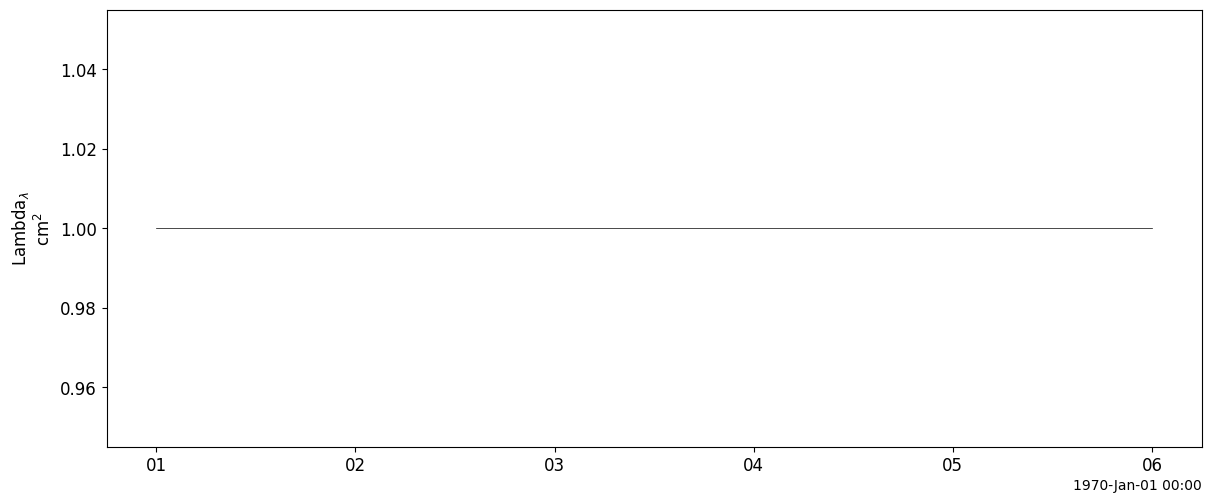

In [13]:
options('data', 'ytitle', r'Lambda$_{λ}$')

tplot('data')

Change the size of the text

Note: this also updates the z-axis title and subtitle size

In [14]:
options('data', 'charsize', 16)

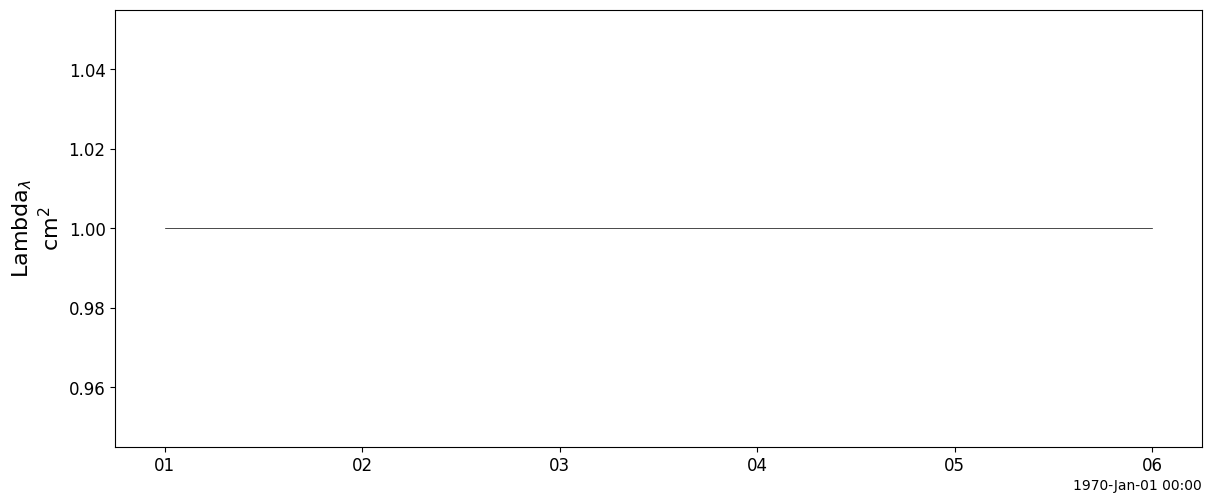

In [15]:
tplot('data')

Add a title to the figure

In [16]:
from pyspedas import tplot_options

In [17]:
tplot_options('title', 'Figure Title')

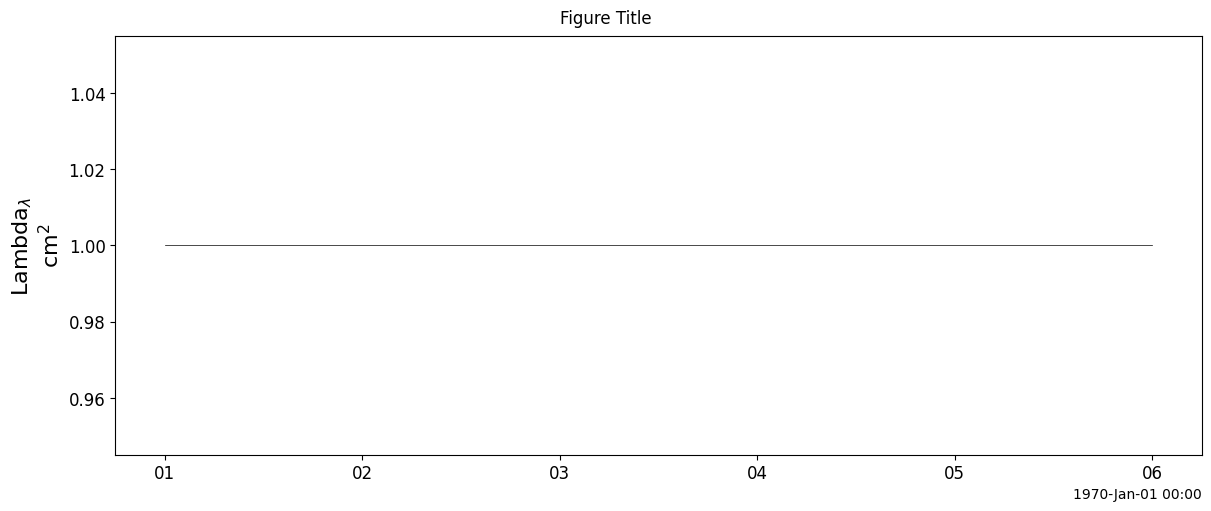

In [18]:
tplot('data')

Use the annotate function to add text to the figure

In [19]:
annotate('data', 'This is our text', [0.5, 0.5])

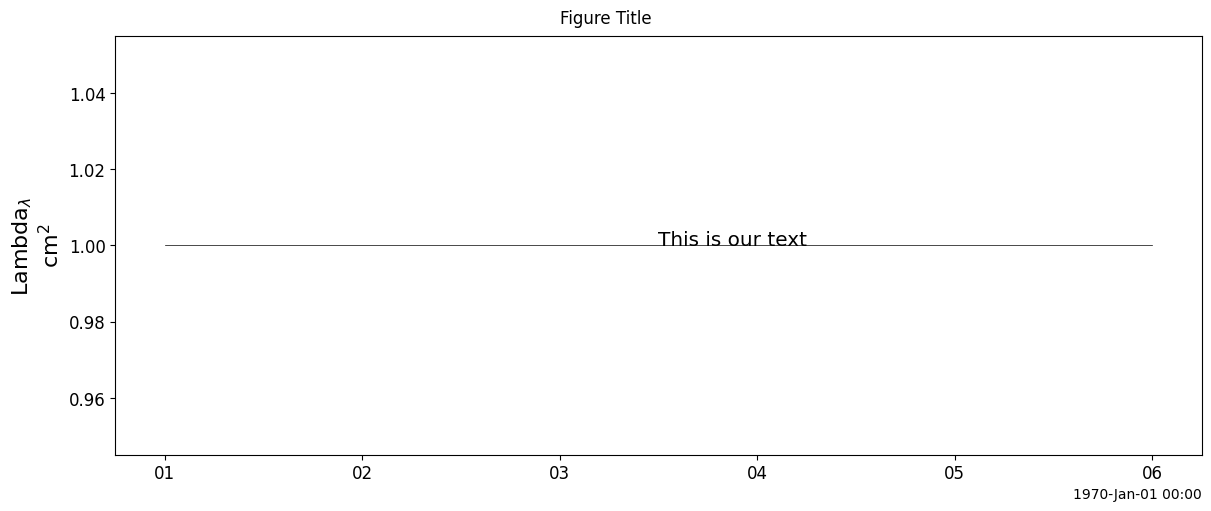

In [20]:
tplot('data')

Let's see what happens with two panels:

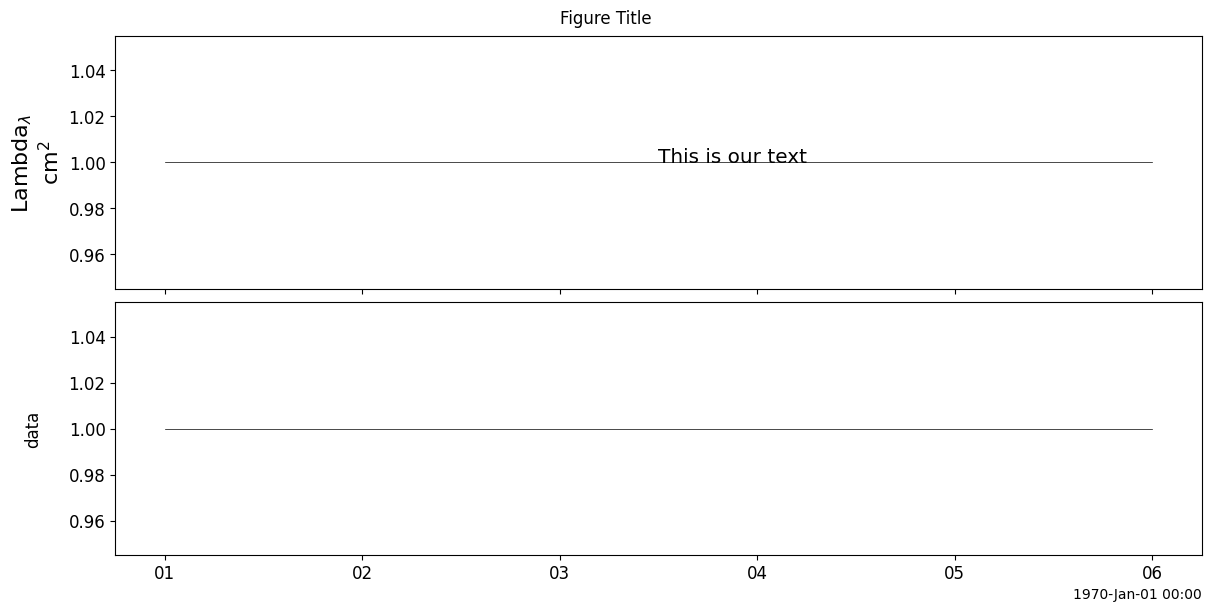

In [21]:
tplot('data data2')

In [22]:
help(annotate)

Help on function annotate in module pytplot.MPLPlotter.annotate:

annotate(tvar=None, text=None, position=None, xycoords='axes fraction', color='black', fontfamily=None, fontsize='x-large', alpha=1, fontvariant='normal', fontstyle='normal', fontstretch='normal', fontweight='normal', rotation='horizontal', delete=False)
    Add text annotatons to tplot panels.
    
    Most of the parameters are passed to the matplotlib axes.annotate() method as a dictionary.
    
    Parameters
    
    tvar: str
        A tplot variable name or list of names to add annotations to (wildcards accepted).
    text: str
        Text to add to the plot
    position: tuple or array
        The location for the annotation to appear
    xycoords: str
        The coordinate system to use for the position. 'axes fraction' interprets the positions relative to the panel size. 'data' uses
        data coordinates (times for the x axis, data values for the y axis).  Times should be passed as np.datetime64 objects.
 

You can set the `xycoords` keyword to change coordinates specified in the `position` keyword. For example, to add some text in data coordinates:

In [23]:
from datetime import datetime, timezone
import matplotlib
import numpy as np

time = np.datetime64('1970-01-01T00:00:03', 'ns')

In [24]:
annotate('data2', 'This is the second text', [time, 0.985], xycoords='data')

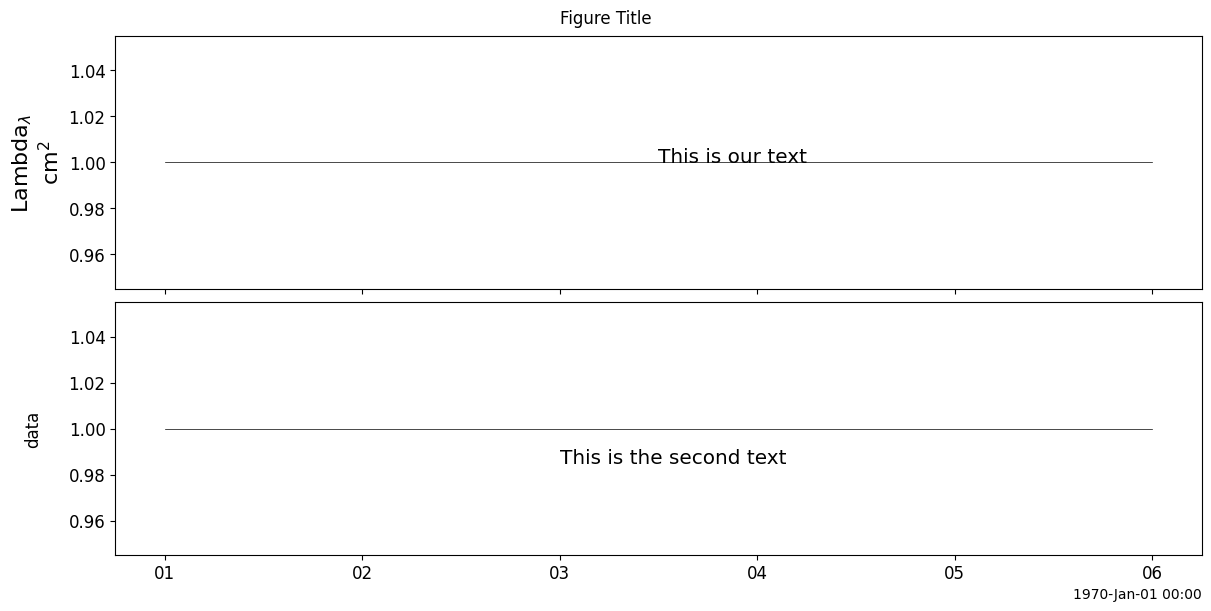

In [25]:
tplot('data data2')

You can also set the options in an `opts` dictionary, and supply them with `**opts`

In [26]:
opts = {'xycoords': 'data',
        'fontsize': 'xx-large',
        'color': 'blue',
        'rotation': 'vertical'}

In [27]:
annotate('data2', 'This is the third text', [time, 0.985], **opts)

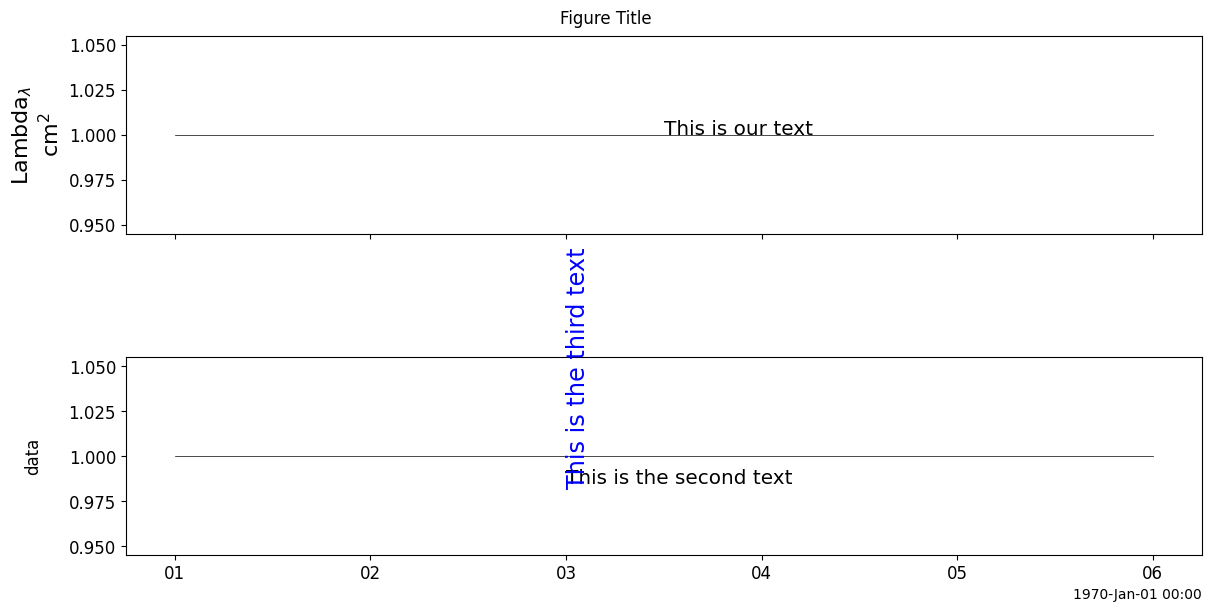

In [28]:
tplot('data*')

Delete the annotations by setting the `delete` keyword. This removes all of the current annotations previously set with the `annotate` function

In [29]:
annotate('data',delete=True)

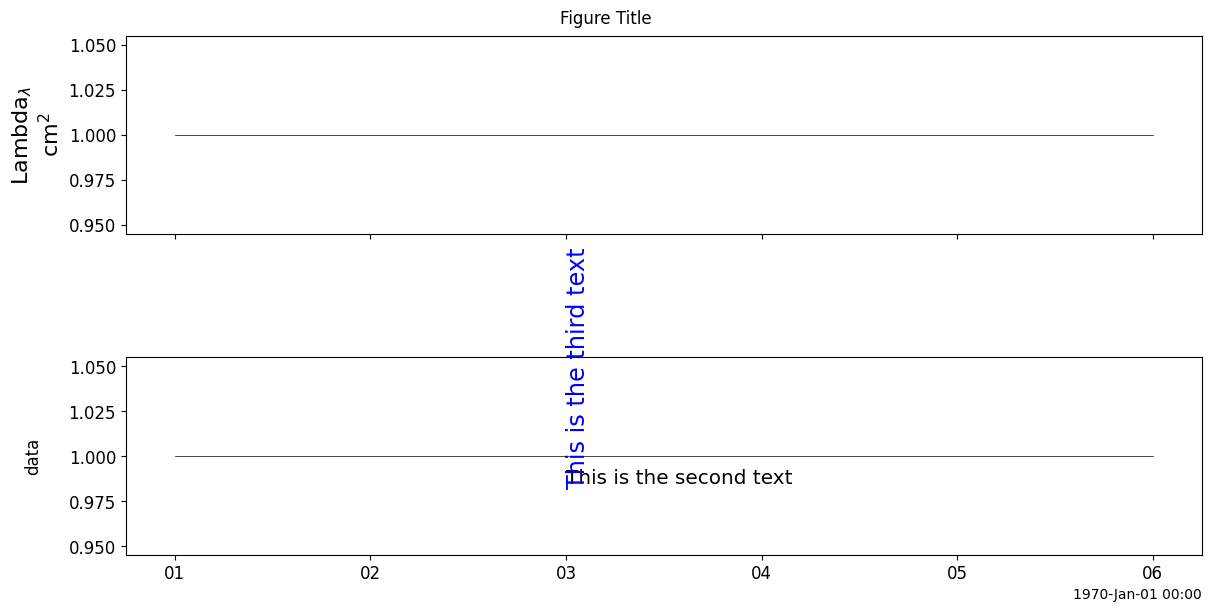

In [30]:
tplot('data*')